In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from datetime import datetime
from pathlib import Path
import sys

SRC = Path("__file__").resolve().parents[1]
if str(SRC) not in sys.path:
    sys.path.append(str(SRC))

import config as cfg

In [5]:
# set plot defaults
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 7)

# load the traffic counts and the mapping file
dft_path = cfg.RAW_TRF / "dft_traffic_counts_aadf.csv"
df = pd.read_csv(dft_path, low_memory=False)

map_path = cfg.MATCHED_SITES
map_df = pd.read_csv(map_path)

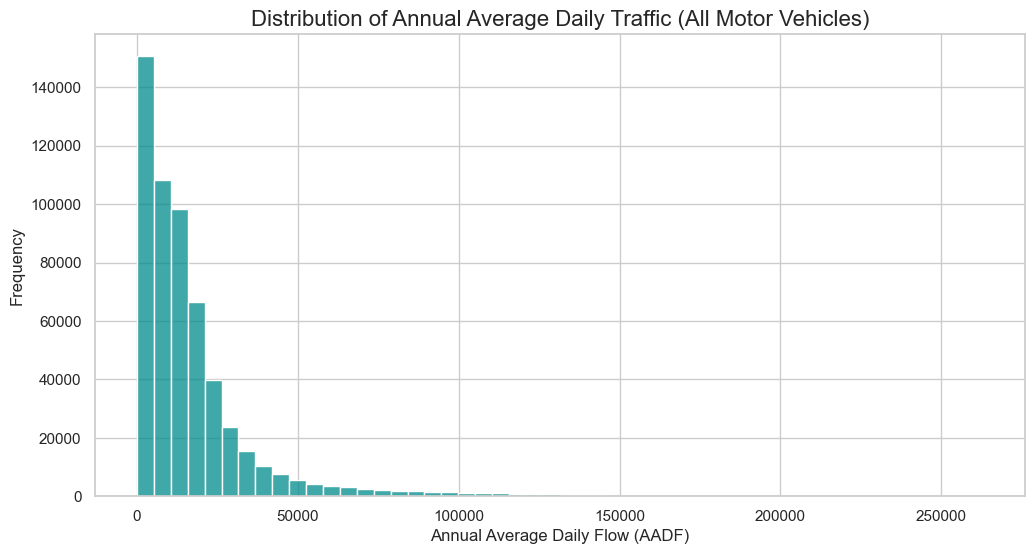

In [17]:
# select a key column to analyze, like 'all_motor_vehicles'
traffic_volume = df['all_motor_vehicles']

# plot the distribution
plt.figure(figsize=(12, 6))
sns.histplot(traffic_volume, bins=50, color='darkcyan')
plt.title('Distribution of Annual Average Daily Traffic (All Motor Vehicles)', fontsize=16)
plt.xlabel('Annual Average Daily Flow (AADF)')
plt.ylabel('Frequency')
plt.show()

In [29]:
df.columns.unique() 

Index(['count_point_id', 'year', 'region_id', 'region_name', 'region_ons_code',
       'local_authority_id', 'local_authority_name', 'local_authority_code',
       'road_name', 'road_category', 'road_type', 'start_junction_road_name',
       'end_junction_road_name', 'easting', 'northing', 'latitude',
       'longitude', 'link_length_km', 'link_length_miles', 'estimation_method',
       'estimation_method_detailed', 'pedal_cycles',
       'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'all_HGVs',
       'all_motor_vehicles'],
      dtype='object')

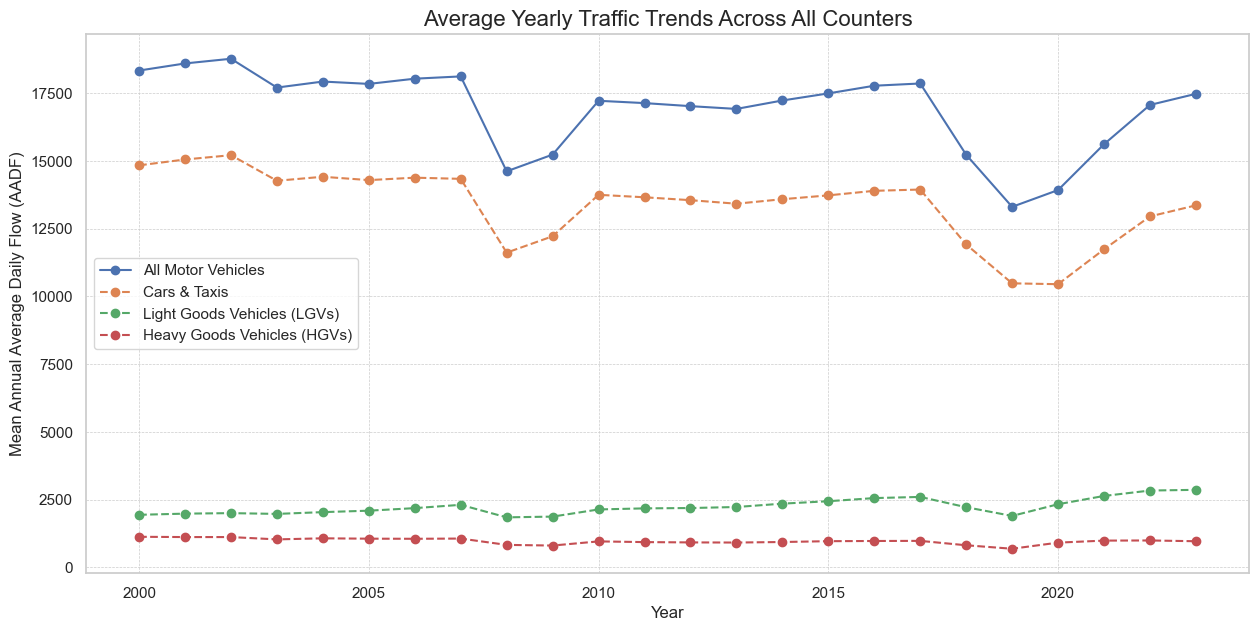

In [31]:
# group by year using the correct column names from your file
yearly_traffic = df.groupby('year')[
    ['all_motor_vehicles', 'cars_and_taxis', 'LGVs', 'all_HGVs']
].mean().reset_index()

# plot the trends over time
plt.plot(yearly_traffic['year'], yearly_traffic['all_motor_vehicles'], marker='o', linestyle='-', label='All Motor Vehicles')
plt.plot(yearly_traffic['year'], yearly_traffic['cars_and_taxis'], marker='o', linestyle='--', label='Cars & Taxis')
plt.plot(yearly_traffic['year'], yearly_traffic['LGVs'], marker='o', linestyle='--', label='Light Goods Vehicles (LGVs)')
plt.plot(yearly_traffic['year'], yearly_traffic['all_HGVs'], marker='o', linestyle='--', label='Heavy Goods Vehicles (HGVs)')

plt.title('Average Yearly Traffic Trends Across All Counters', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Mean Annual Average Daily Flow (AADF)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

C:\Users\clown\AppData\Local\Temp\ipykernel_13288\1770342531.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='road_type', y='all_motor_vehicles', order=road_type_order, palette='viridis')


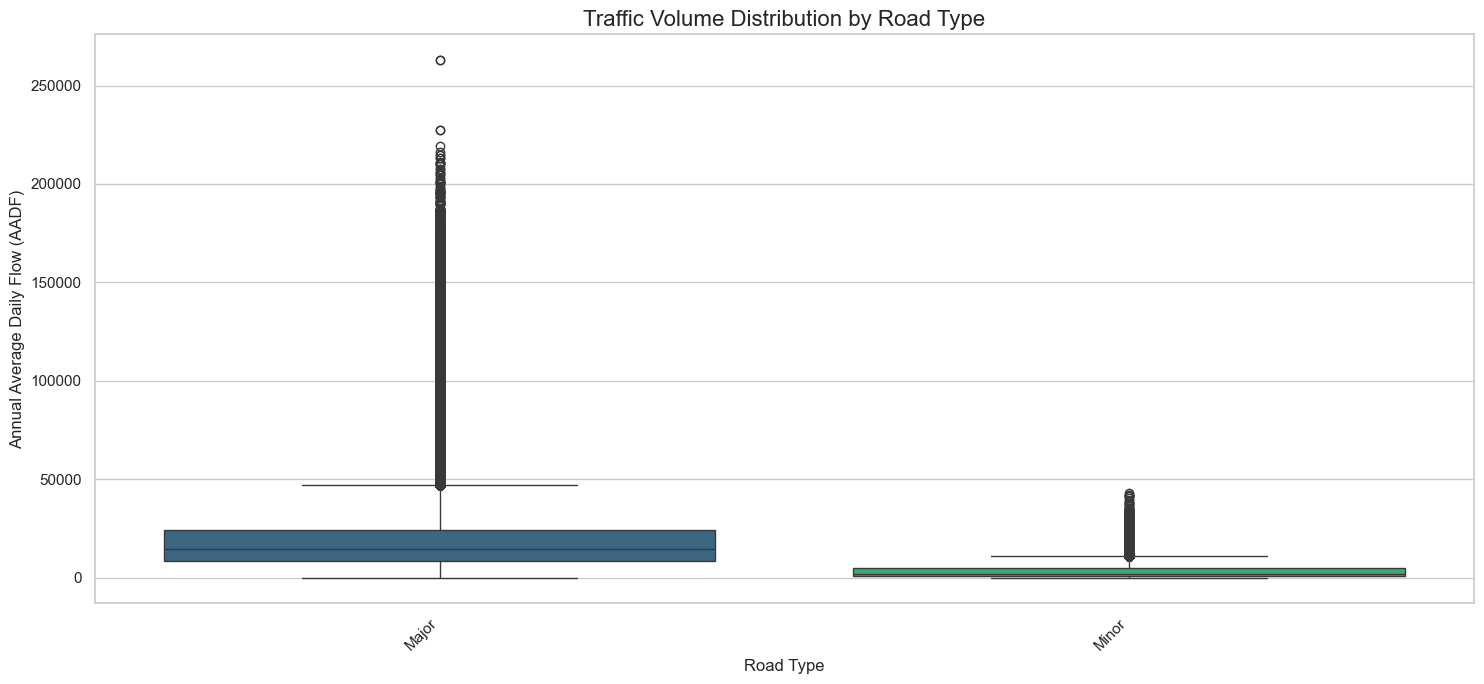

In [51]:

# for a cleaner plot, road types by their median traffic volume
road_type_order = df.groupby('road_type')['all_motor_vehicles'].median().sort_values(ascending=False).index

# create the box plot
plt.figure()
sns.boxplot(data=df, x='road_type', y='all_motor_vehicles', order=road_type_order, palette='viridis')

# add titles and labels for clarity
plt.title('Traffic Volume Distribution by Road Type', fontsize=16)
plt.xlabel('Road Type')
plt.ylabel('Annual Average Daily Flow (AADF)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()